# Nash-Q Learning Educational Software
This project aims to create an educational software that could be used by anyone interested in learning about artificial intelligence, specifically in the area of multi-agent systems and the Nash-Q learning algorithm.

The goal is to make the process that agents follow when applying the algorithm to explore a new environment more understandable. This includes showing how the agents' knowledge of the environment updates at every step, how they make decisions about what actions to take, and their final internal representation of the environment after training.

In this notebook, you can select a number of agents to train (between 1 and 4), and edit the environment where they will be trained, or chose one of the aviable presets. After that, it will be possible to run a training session for the agents, after setting the parameters for this phase. Following the training, the results will be displayed in a dedicated section.

## Table of Contents
1. Imports
2. Environment settings
3. Training
4. Results

## 1. Imports Needed for Using the Notebook
- %matplotlib widget is a magic function, used to enable the interactive Matplotlib backend for Jupiter notebooks
- Then it's possible to see the imports for the classes that define the environment where the training is held, with his widget and display, the implementation of the NashQ algorithm, and a final display used to show the results
- Next there is the imports for the widgets and the display, used to render the interfaces
- Lastly, the other two magic functions are used to automatically reload the Python kernel at every run, in order to get the updates from classes that have been eventually modified

In [45]:
%matplotlib widget
from Model.Environment import Environment
from Interface.Classes.GameEditor import EnvironmentWidget
from Interface.Classes.EnvGraphDisplay import EnvGraphDisplay
from Model.NashQLearning import *
from Interface.Classes.FinalDisplay import FinalDisplay
from Interface.Classes.PresetGames import PresetGames
import ipywidgets as widgets
from IPython.display import display


# autoreload   
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
#

## 2. Setting the Environment
The environment where the agents will be trained can be created using the following two interfaces.  
If you decide to use one of the presets already created, you just need to select it from the dropdown menu.

The aviable presets will be explained here:
0. Empty preset, that only selects the minimum number of **players** (2), and 2 **games**
1. Defines an environment with 2 **players** and 2 **games**, with deterministic transitions, with payoffs, equal for each player on every transition, setted in such a way that the agents should be led to **game** 1, where it should be best for them to stay because of the payoffs. That means that the only *Nash-Q equilibrium* is playing the action profile (0, 0) in both the **games**
2. Defines an environment with 3 **players** and 2 **games**, again with deterministic transitions and equal payoffs between the agents, where the goal state is **game** 1 and the *Nash-Q equilibrium* is 
3. 
4. 

In [47]:
env = Environment()
preset = PresetGames(env)

envWidget = EnvironmentWidget(env)


display(preset.getWidget())

Dropdown(description='Preset:', options=(0, 1, 2, 3, 4), value=0)

If otherwhise you decide to create, your own environment, you can do it in the following interface.

First of all, you need to chose the number of **players** (that is the number of agents), limited to 4 for reasons of complexity of representation, and the number of **games** (states that can be reached by the agents).  

When defining the number of states, the user should keep in mind its definition as: ***S*** = *s<sub>1</sub> x s<sub>2</sub> x ... x s<sub>i</sub>*, with *i* = 1, ..., n as the number of agents and *s<sub>i</sub>* as the state space for the *i-th* agent. This means that the state space is defined as the Cartesian product of the individual state spaces for every agent. Therefore, every state represents one of the combinations of positions of the agents, and the transitions between states always involve all the agents together.  

After setting the number of **players** and **games**, it is possible to define a global number of possible **actions**, equal for every **players** in every **game**, or different number of **actions** for each **player** in each **game**.  

Then, in every **game** defined, for every **action profile** *A* in the set of action profiles ***A*** = *a<sub>1</sub> x a<sub>2</sub> x ... x a<sub>i</sub>*, with *a<sub>i</sub>* set of possible actions for the *i-th* **player**, it is possible to set the **probability** of the transition towards all the **games** in the environment, along with the associated **payoff**.  

The graph below the settings interface shows the current state space and the possible transitions between states, with the associated **probability** or **reward**, depending on the option chosen.


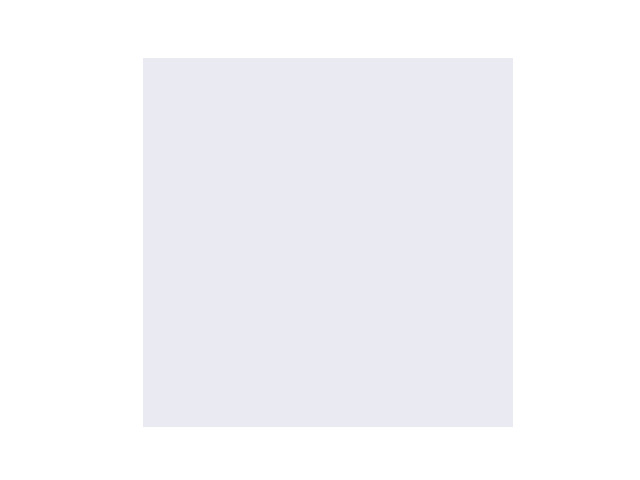

In [48]:

envGraph = EnvGraphDisplay(env, timeBuffer=0.5)
vBox = widgets.VBox([envWidget.getWidget(), envGraph.get_widget()])
display(vBox)

## 3. Training of the agents ##
In the following section, it will be possible to set the parameters for the trainig phase.  
The paramethers that can be personalized are the following:
- *Episodes*: number of training episodes
- *Gamma*: **discount factor**, that defines the reduction in the values of the rewards from actrions taken in the future
- *Epsilon*: **exploration-exploitation** paramether, defined as the probability with which the algorithm choses a random action (exploration) over the best possible action (exploitation)
- *Pure epsilon epidoses*: number of episodes after which *epsilon* starts decreasing, opting more and more for *exploitation* over *exploration*
- *Alfa*: **learning rate**, determines the weight of the updates on the values already known, as the speed at which the agent learns
- *Pure training episodes*: number of trainings after which *alpha* starts decreasing, reducing the weight of the new updates
- *Reset on goal state*: sets the environment in such a way that after reaching the goal state, the agents are brought back to the starting state, in order to learn again from the beginning
- *Start state*: defines from which state the agents will start
- *Goal state*: defines the goal state

After that, the training phase can be run by pressing the *Train* button.


In [49]:
nashQLearning = NashQLearning(env)
display(nashQLearning.getDisplayable())

GridBox(children=(IntText(value=1, description='Episodes:'), FloatText(value=0.8, description='Gamma:'), Float…

## 4. Results ##
The last section shows the results from the training.

First of all you can define a *window size*, as a percentage of the number of episodes, that will be used to smooth the rewards, in order to make them more readable in the graph. Lower values of *window size* allow you to better see the variations in the rewards, while higher values of this paramether make the graph more smooth, reducing the variations.

The reward graph displays the value of the reward received by every player, and the sum of their reward, for every training episode; by using the slider, by typing a value in, or by navigating using the arrows, it is possible to select a specific episode, and see its rewards signaled by the red vertical line. It is also possible to automatically advance in the episodes, by pressing the play button, whith the desired speed, as the number of episodes advanced for each second.

When a training episode is selected, all the information relative to that are displayed below:
- the state-space graph shows the states, highlighting the current state and the transition that has been taken in the state; depending on your selection in the dropdown menues, it can show the **Q-tables** or the **policy** that are associated to the states in the episode chosen, and relative to the selected agent. On the edge of the graph relative to the current action and transition, it is also possible to see the differences from the previous values in the *Q-Table*.
- below that, the interface shows the *current game*, the *current action profile*, meaning the actions taken by every agent in the state, the *current payoff*, as the reward received by every agent when taking the chosen action in the current state, and finally the *Q-Tables*, for each player in each game, relative to the chosen episode. You should note that the *Q-Tables* will be shown only when the number of players is less than 3, because it wouldn't be possible to display a structure with more than 2 dimentions in the interface.

In [50]:
finalDisplay = FinalDisplay(nashQLearning, env)
display(finalDisplay.get_widget())

In [51]:
import numpy as np

# Given input: numpy array of object dtype containing lists of probabilities
action_probabilities = np.array([
    [0.9999999869664769, 1.3033523252719484e-08],
    [0.9999999934374921, 6.5625078580039775e-09],
    [0.9999999999988227, 1.177291047796495e-12]
], dtype=object)

# Convert each element to a numpy array
prob_arrays = [np.array(player_probs, dtype=np.float64) for player_probs in action_probabilities]

# Generate a grid of all possible action indices for each player
grids = np.meshgrid(*[np.arange(len(player_probs)) for player_probs in prob_arrays], indexing='ij')

# Initialize the joint probability array with ones
joint_prob_shape = [len(player_probs) for player_probs in prob_arrays]
joint_prob_array = np.ones(joint_prob_shape, dtype=np.float64)

# Compute the joint probability by multiplying the probabilities of individual actions
for i, grid in enumerate(grids):
    joint_prob_array *= prob_arrays[i][grid]

print(joint_prob_array)


[[[9.99999980e-01 1.17729102e-12]
  [6.56250777e-09 7.72598165e-21]]

 [[1.30335232e-08 1.53442501e-20]
  [8.55325988e-17 1.00696763e-28]]]
